<a id="intro"></a>
## 1. Introduction

**Pandas** is a powerful Python library for data manipulation, offering labeled data structures that make tasks like cleaning, transformation, merging, and analysis more convenient. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Using Pandas version:", pd.__version__)
print("Using NumPy version:", np.__version__)
print("Using Seaborn version:", sns.__version__)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using Pandas version: 2.2.3
Using NumPy version: 2.1.2
Using Seaborn version: 0.13.2


---
<a id="numpy_vs_pandas"></a>
## 2. Numpy vs. Pandas for Student Scores


<a id="create_excel_csv"></a>
### 2.1 Creating and Saving Student Data to Excel/CSV
We'll first generate some random student data:
- **Name** (string)
- **Maths** (integer)
- **Science** (integer)

Then we'll save to both `.xlsx` and `.csv` for demonstration.

In [2]:
num_students = 20

student_data = {
    "Name": [
        "Aarav", "Vivaan", "Aditya", "Ananya", "Ishita", "Kabir", "Nisha", "Rohan", "Priya", "Sneha",
        "Aryan", "Meera", "Tanya", "Siddharth", "Neha", "Laksh", "Pooja", "Rahul", "Simran", "Kiran"
    ],
    "Maths": np.random.randint(50, 100, size=num_students),
    "Science": np.random.randint(50, 100, size=num_students),
    "Economics": np.random.randint(50, 100, size=num_students),
}

df_students = pd.DataFrame(student_data)

df_students.to_excel("student_scores.xlsx", index=False)
df_students.to_csv("student_scores.csv", index=False)

df_students.head(10)

,Name,Maths,Science,Economics
0,Aarav,53,56,67
1,Vivaan,94,88,85
2,Aditya,84,65,69
3,Ananya,98,90,96
4,Ishita,72,74,78
5,Kabir,79,56,60
6,Nisha,76,52,99
7,Rohan,71,78,50
8,Priya,76,72,68
9,Sneha,64,92,94


<a id="numpy_read"></a>
### 2.2 Reading CSV in NumPy & Basic Analysis

NumPy's `loadtxt` can be used to read **numeric** data easily, but handling **mixed types** (e.g. strings + numbers) can be trickier. We'll demonstrate a simple approach:

1. Read the entire CSV (skipping the header) using `np.loadtxt`.
2. We'll parse the **Name** column as a string and the three score columns as integers.
3. Compute the mean of Maths and Science.
4. Find which student got the maximum in Science.
5. Find which student got the maximum of `|Maths - Science|`.

In [83]:
!head student_scores.csv

Name,Maths,Science,Economics
Aarav,53,56,67
Vivaan,94,88,85
Aditya,84,65,69
Ananya,98,90,96
Ishita,72,74,78
Kabir,79,56,60
Nisha,76,52,99
Rohan,71,78,50
Priya,76,72,68


In [84]:
data = np.loadtxt("student_scores.csv", delimiter = ",", skiprows = 1, dtype = str)
print(data)

[['Aarav' '53' '56' '67']
 ['Vivaan' '94' '88' '85']
 ['Aditya' '84' '65' '69']
 ['Ananya' '98' '90' '96']
 ['Ishita' '72' '74' '78']
 ['Kabir' '79' '56' '60']
 ['Nisha' '76' '52' '99']
 ['Rohan' '71' '78' '50']
 ['Priya' '76' '72' '68']
 ['Sneha' '64' '92' '94']
 ['Aryan' '60' '92' '97']
 ['Meera' '62' '56' '89']
 ['Tanya' '70' '78' '88']
 ['Siddharth' '73' '72' '83']
 ['Neha' '79' '85' '95']
 ['Laksh' '68' '62' '88']
 ['Pooja' '63' '62' '57']
 ['Rahul' '81' '63' '67']
 ['Simran' '69' '98' '78']
 ['Kiran' '85' '82' '95']]


In [85]:
print(data.dtype)

<U9


In [86]:
names = data[:, 0].tolist()
maths_np = np.array(data[:, 1].astype(int))
science_np = np.array(data[:, 2].astype(int))
eco_np = np.array(data[:, 3].astype(int))

print("Names:", names)
print("Maths scores:", maths_np)
print("Science scores:", science_np)
print("Economics scores:", eco_np)

Names: ['Aarav', 'Vivaan', 'Aditya', 'Ananya', 'Ishita', 'Kabir', 'Nisha', 'Rohan', 'Priya', 'Sneha', 'Aryan', 'Meera', 'Tanya', 'Siddharth', 'Neha', 'Laksh', 'Pooja', 'Rahul', 'Simran', 'Kiran']
Maths scores: [53 94 84 98 72 79 76 71 76 64 60 62 70 73 79 68 63 81 69 85]
Science scores: [56 88 65 90 74 56 52 78 72 92 92 56 78 72 85 62 62 63 98 82]
Economics scores: [67 85 69 96 78 60 99 50 68 94 97 89 88 83 95 88 57 67 78 95]


In [88]:
print(type(maths_np))
print(maths_np.dtype)


<class 'numpy.ndarray'>
int64


In [91]:
mean_maths = np.mean(maths_np)
mean_science = np.mean(science_np)
mean_eco = np.mean(eco_np)

print(f"\nMean Maths score: {mean_maths:.3f}")
print(f"Mean Science score: {mean_science:.3f}")
print(f"Mean Economics score: {mean_eco:.3f}")

print(f"\nMean Maths score (integer): {mean_maths:.2f}")



Mean Maths score: 73.850
Mean Science score: 73.650
Mean Economics score: 80.150

Mean Maths score (integer): 73.85


In [92]:
# Finding student with maximum science
max_sci_idx = np.argmax(science_np)
print(max_sci_idx)

18


In [93]:
# since we need the name of the student, we use the index (from argmax) to find the name
max_sci_student = names[max_sci_idx]
max_sci_val = science_np[max_sci_idx]
print(f"\nStudent with maximum science score: {max_sci_student} ({max_sci_val})")


Student with maximum science score: Simran (98)


In [94]:
# Likewise for finding student with maximum |Maths - Science| score
diff = np.abs(maths_np - science_np)
max_diff_idx = np.argmax(diff)
max_diff_student = names[max_diff_idx]
print(f"\nStudent with max |Maths - Science|: {max_diff_student} (|{maths_np[max_diff_idx]} - {science_np[max_diff_idx]}| = {diff[max_diff_idx]})")


Student with max |Maths - Science|: Aryan (|60 - 92| = 32)


<a id="numpy_plot"></a>
### 2.3 Plotting Student Scores with NumPy/Seaborn


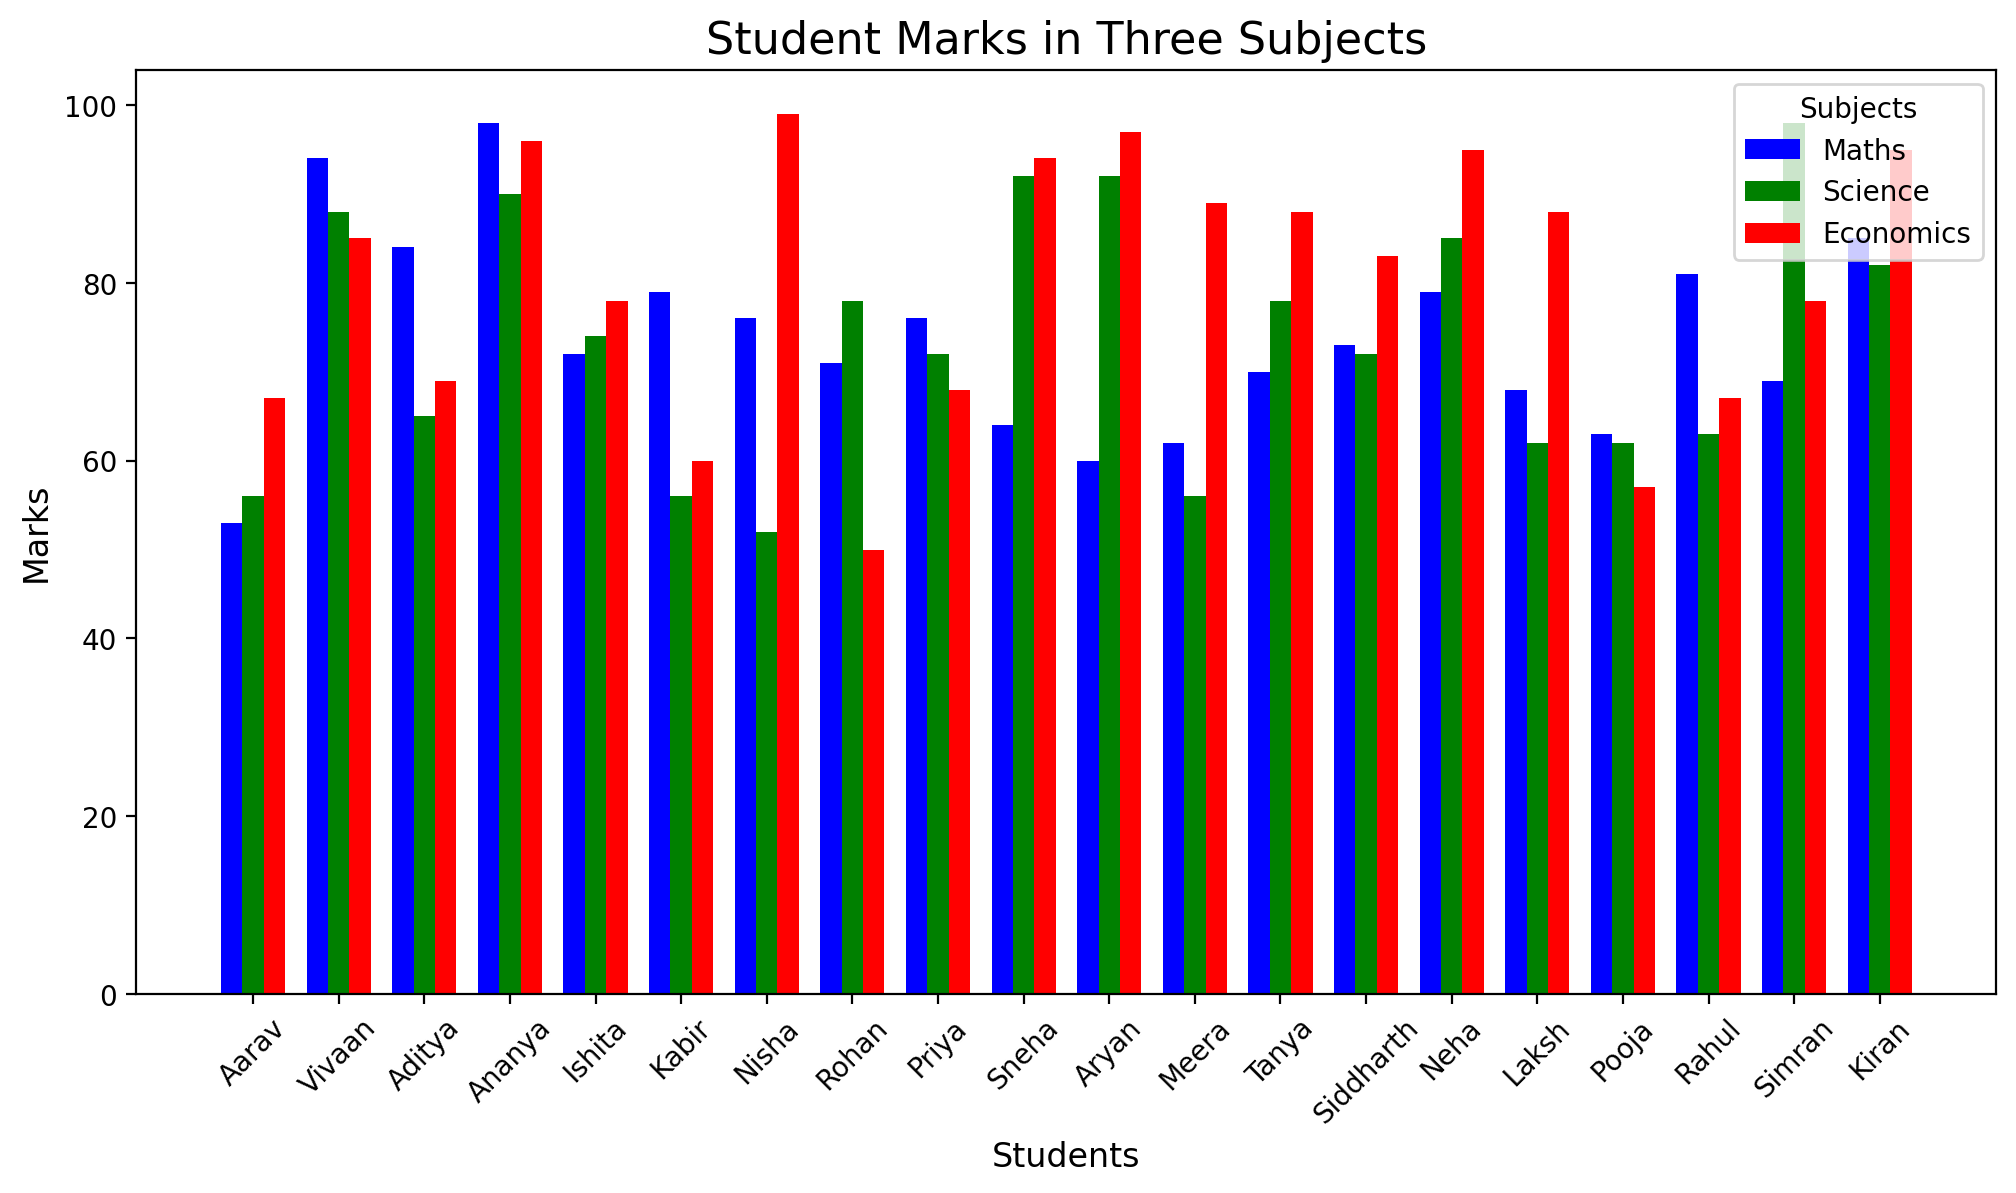

In [95]:
# Define bar width and positions
bar_width = 0.25
x = np.arange(len(names))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bars
ax.bar(x - bar_width, maths_np, width=bar_width, label="Maths", color='blue')
ax.bar(x, science_np, width=bar_width, label="Science", color='green')
ax.bar(x + bar_width, eco_np, width=bar_width, label="Economics", color='red')

# Customize the plot
ax.set_title("Student Marks in Three Subjects", fontsize=16)
ax.set_xlabel("Students", fontsize=12)
ax.set_ylabel("Marks", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
ax.legend(title="Subjects")

<a id="pandas_read"></a>
### 2.4 Reading CSV in Pandas & Repeating Analysis
With Pandas, we can directly do:
```python
df = pd.read_csv("student_scores.csv")
```
and the DataFrame will automatically separate columns into name, maths, and science. Then we can easily compute means, maxima, etc.

In [96]:
df_students_pandas = pd.read_csv("student_scores.csv")
df_students_pandas

,Name,Maths,Science,Economics
0,Aarav,53,56,67
1,Vivaan,94,88,85
2,Aditya,84,65,69
3,Ananya,98,90,96
4,Ishita,72,74,78
5,Kabir,79,56,60
6,Nisha,76,52,99
7,Rohan,71,78,50
8,Priya,76,72,68
9,Sneha,64,92,94


In [97]:
df_students_pandas.describe()

,Maths,Science,Economics
count,20.000000,20.000000,20.000000
mean,73.850000,73.650000,80.150000
std,11.230949,14.224793,14.928866
min,53.000000,52.000000,50.000000
25%,67.000000,62.000000,67.750000
50%,72.500000,73.000000,84.000000
75%,79.500000,85.750000,94.250000
max,98.000000,98.000000,99.000000


In [99]:
!head student_scores.csv

Name,Maths,Science,Economics
Aarav,53,56,67
Vivaan,94,88,85
Aditya,84,65,69
Ananya,98,90,96
Ishita,72,74,78
Kabir,79,56,60
Nisha,76,52,99
Rohan,71,78,50
Priya,76,72,68


In [100]:
df_students_pandas.head?

Signature: df_students_pandas.head(n: 'int' = 5) -> 'Self'
Docstring:
Return the first `n` rows.

This function returns the first `n` rows for the object based
on position. It is useful for quickly testing if your object
has the right type of data in it.

For negative values of `n`, this function returns all rows except
the last `|n|` rows, equivalent to ``df[:n]``.

If n is larger than the number of rows, this function returns all rows.

Parameters
----------
n : int, default 5
    Number of rows to select.

Returns
-------
same type as caller
    The first `n` rows of the caller object.

See Also
--------
DataFrame.tail: Returns the last `n` rows.

Examples
--------
>>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
>>> df
      animal
0  alligator
1        bee
2     falcon
3       lion
4     monkey
5     parrot
6      shark
7      whale
8      zebra

Viewing the first 5 lines

>>> df.head()


In [101]:
df_students_pandas.head(n=10)

,Name,Maths,Science,Economics
0,Aarav,53,56,67
1,Vivaan,94,88,85
2,Aditya,84,65,69
3,Ananya,98,90,96
4,Ishita,72,74,78
5,Kabir,79,56,60
6,Nisha,76,52,99
7,Rohan,71,78,50
8,Priya,76,72,68
9,Sneha,64,92,94


In [14]:
df_students_pandas.tail()

,Name,Maths,Science,Economics
15,Laksh,68,62,88
16,Pooja,63,62,57
17,Rahul,81,63,67
18,Simran,69,98,78
19,Kiran,85,82,95


In [102]:
# Displaying the indices and columns
print(f"Indices: {df_students_pandas.index}")
print(f"Columns: {df_students_pandas.columns}")

Indices: RangeIndex(start=0, stop=20, step=1)
Columns: Index(['Name', 'Maths', 'Science', 'Economics'], dtype='object')


In [103]:
# Displaying the data types of each column
print("\nData Info:")
df_students_pandas.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       20 non-null     object
 1   Maths      20 non-null     int64 
 2   Science    20 non-null     int64 
 3   Economics  20 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 772.0+ bytes


In [104]:
# Mean
print("\nMean Maths:", df_students_pandas['Maths'].mean())
print("Mean Science:", df_students_pandas['Science'].mean())


Mean Maths: 73.85
Mean Science: 73.65


In [18]:
# Student with maximum science using different indexing methods
df_students_pandas.loc[df_students_pandas['Science'].idxmax()]

Name         Simran
Maths            69
Science          98
Economics        78
Name: 18, dtype: object

In [19]:
# Student with maximum |Maths - Science|
diff_pd = (df_students_pandas['Maths'] - df_students_pandas['Science']).abs()
max_diff_idx_pd = diff_pd.idxmax()
print("\nStudent with max |Maths - Science|:", df_students_pandas.loc[max_diff_idx_pd, 'Name'], diff_pd[max_diff_idx_pd])


Student with max |Maths - Science|: Aryan 32


### Histogram of Student Scores using df.plot()

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

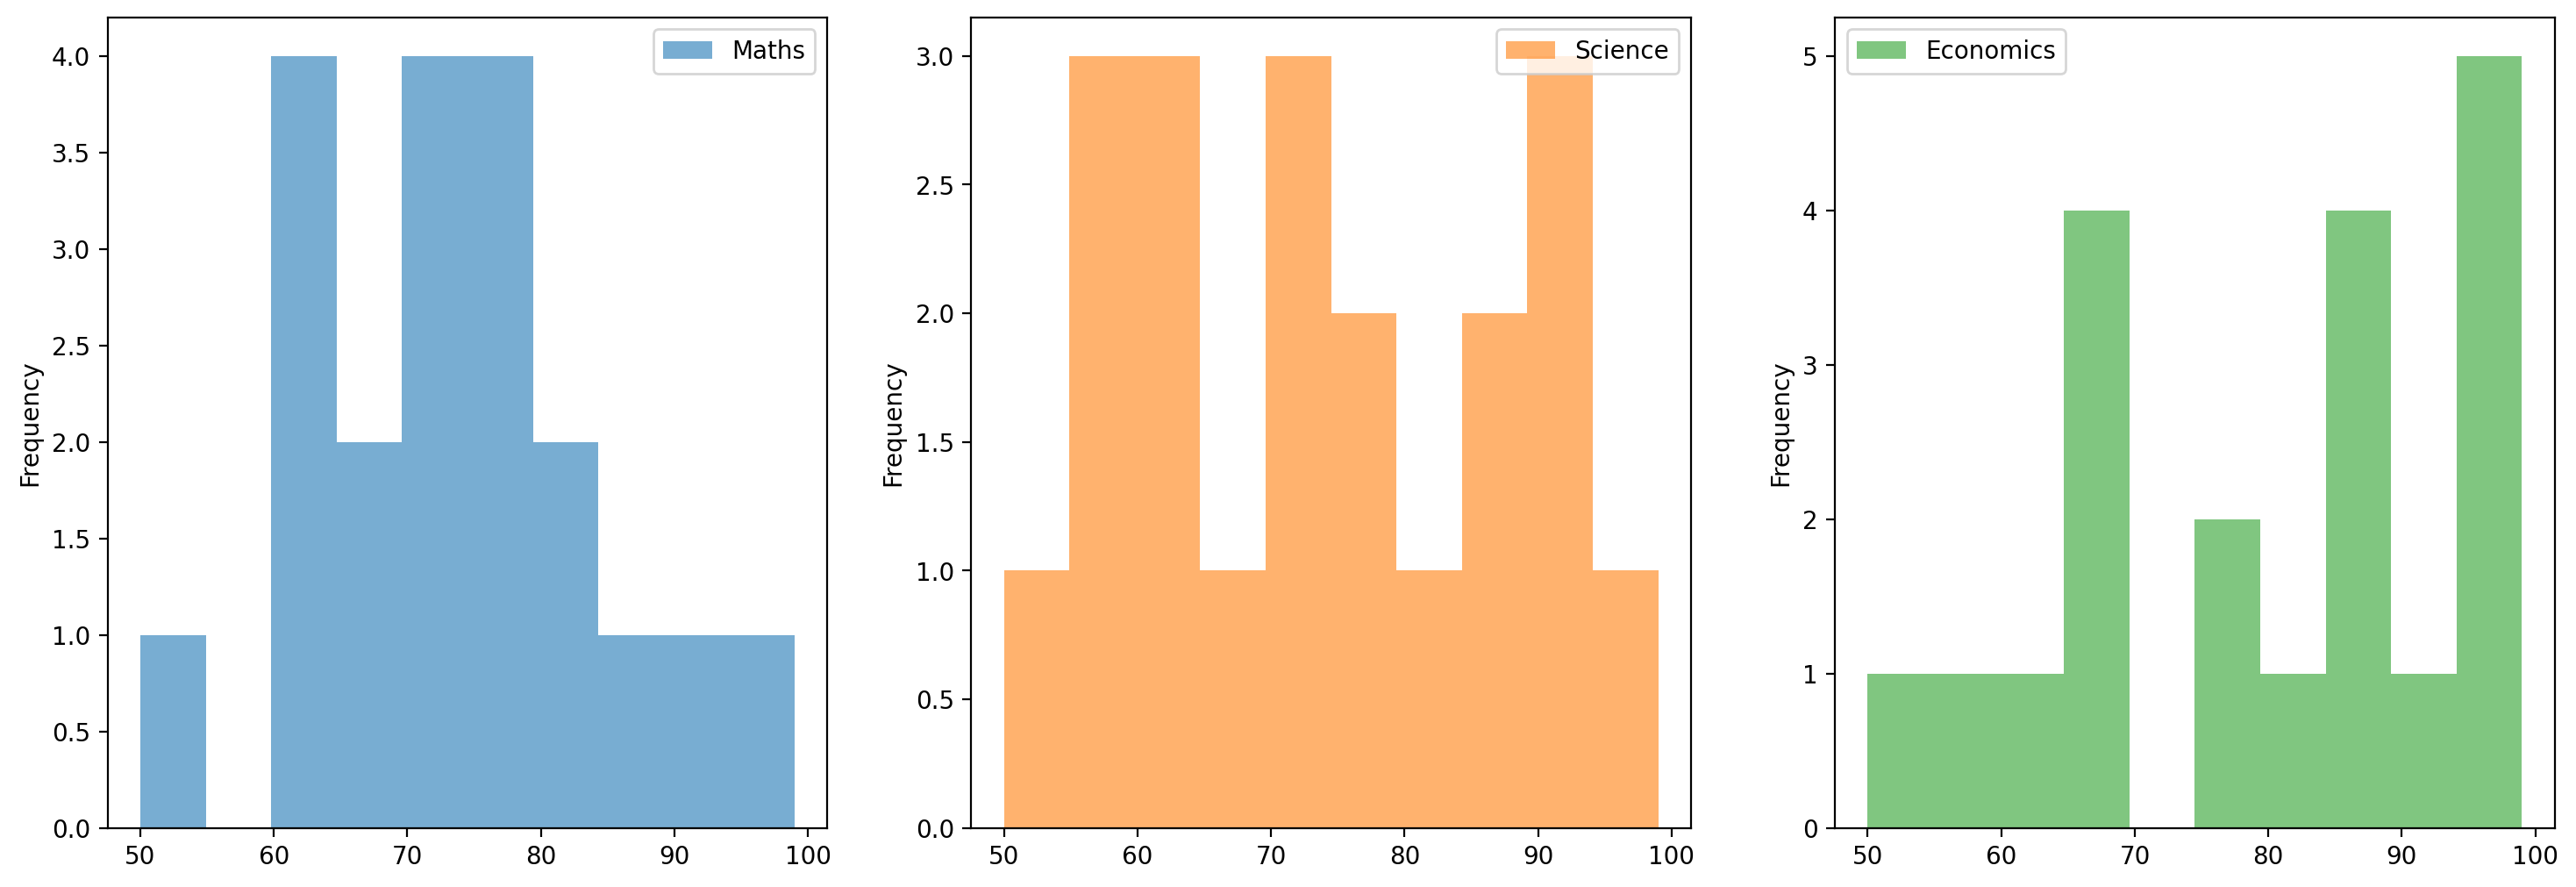

In [105]:
df_students_pandas.plot.hist(subplots=True, layout=(1, 3), figsize=(18, 6), bins=10, alpha=0.6)

array([[<Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>]], dtype=object)

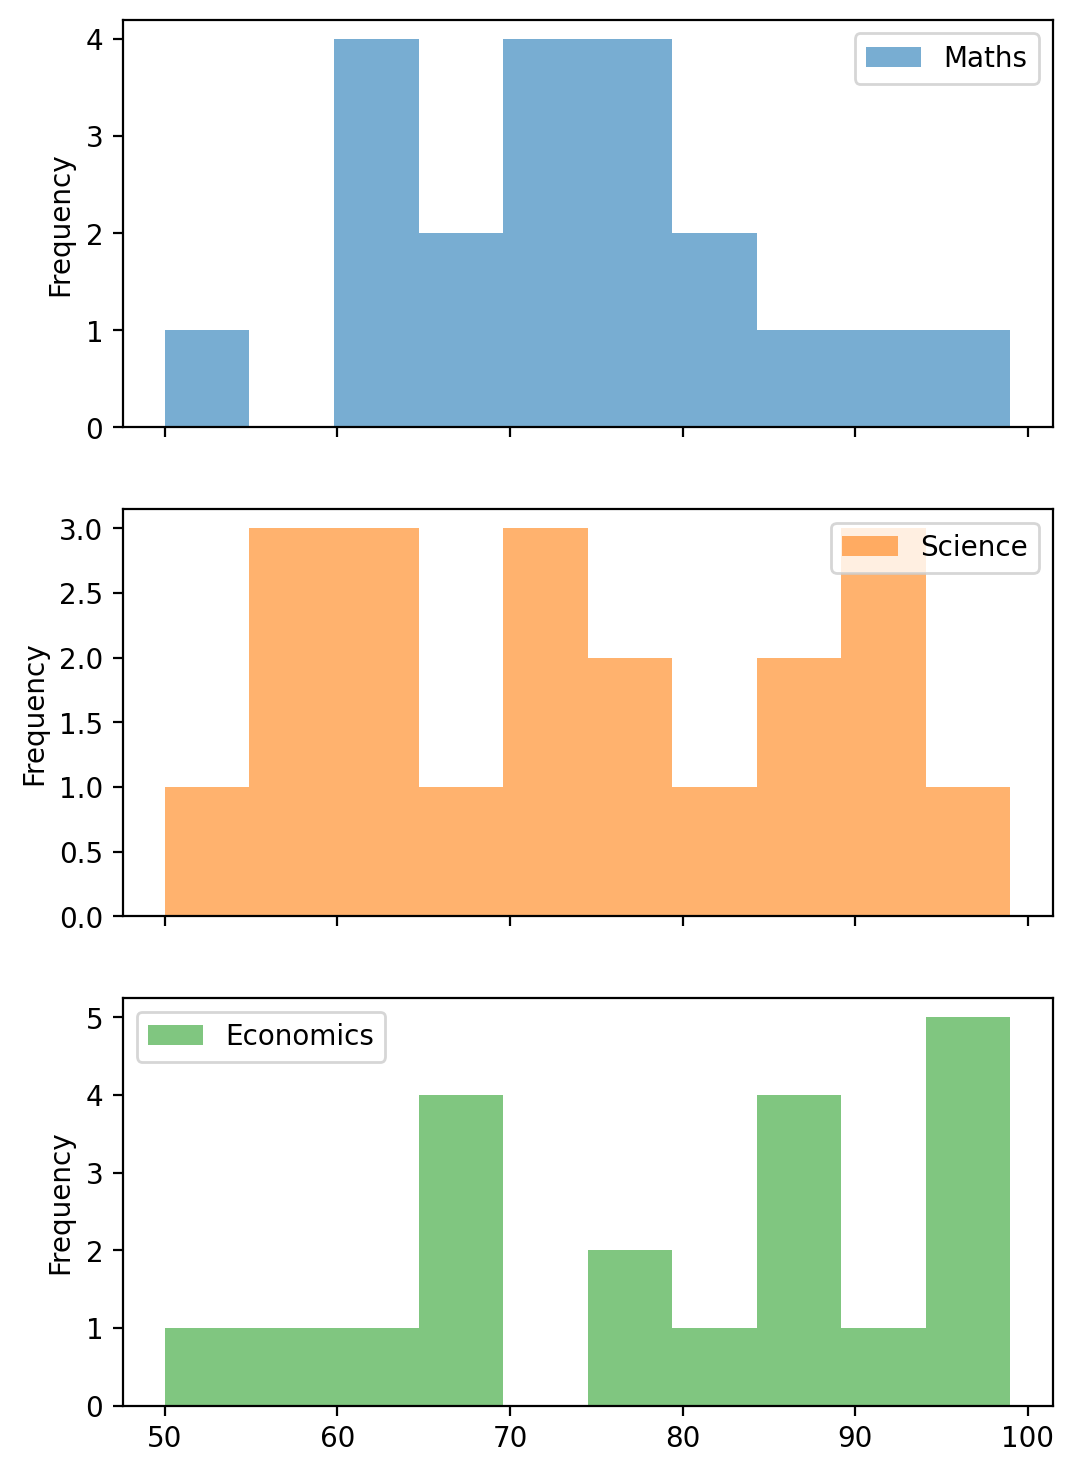

In [106]:
df_students_pandas.plot.hist(subplots=True, layout=(3, 1), figsize=(6, 9), bins=10, alpha=0.6)

<Axes: ylabel='Frequency'>

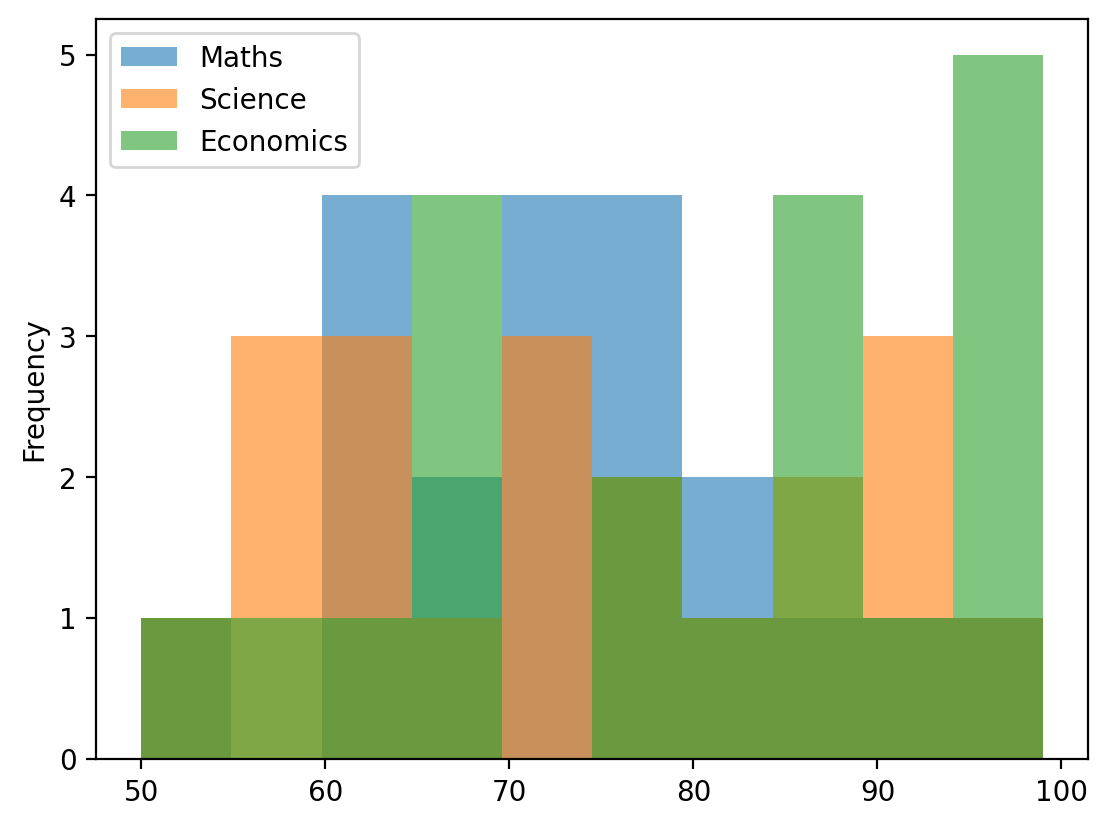

In [107]:
df_students_pandas.plot.hist(subplots=False, alpha=0.6)

<Axes: ylabel='Density'>

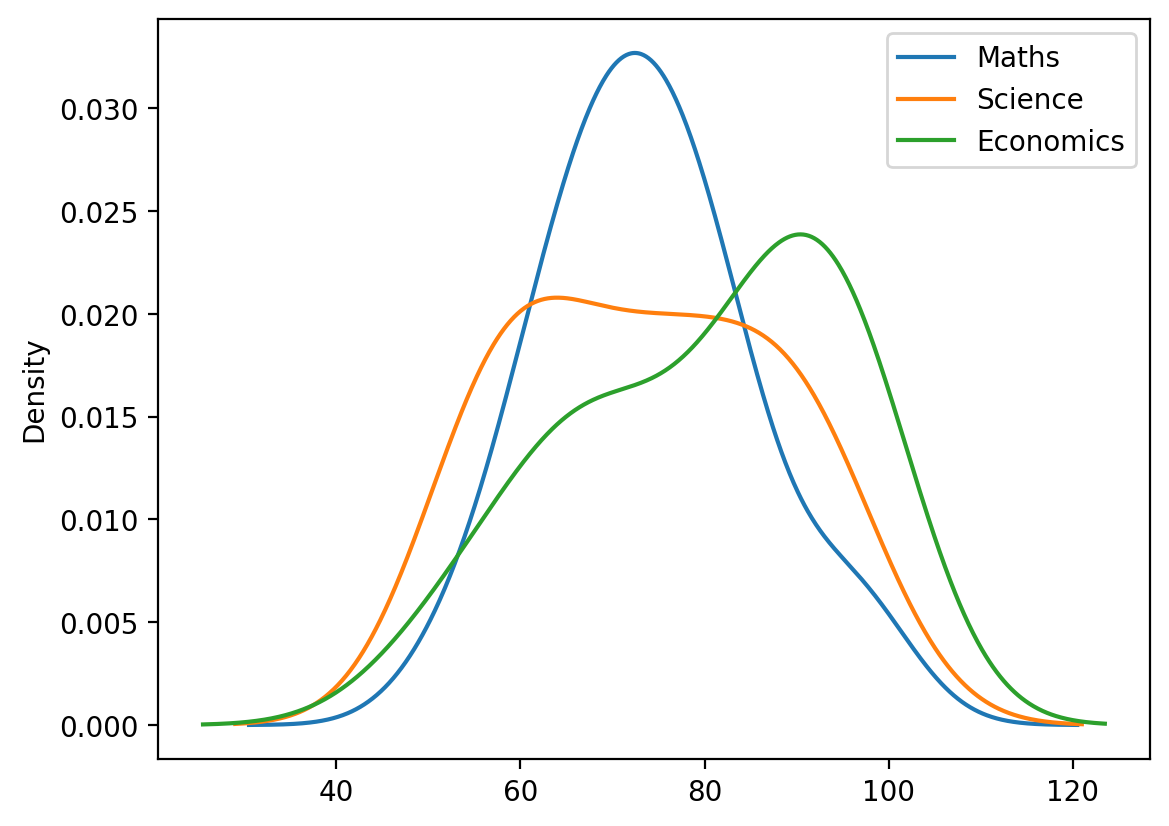

In [108]:
df_students_pandas.plot.density()

### Some more plotting examples with Pandas `df.plot()`

In [24]:
normal = pd.Series(np.random.normal(loc = 10, scale = 2, size = 2000)) # loc is mean, scale is standard deviation
gamma = pd.Series(np.random.gamma(shape = 2, scale = 2, size = 2000)) # shape is k, scale is theta
uniform = pd.Series(np.random.uniform(low = 0, high = 10, size = 2000)) # low is a, high is b

df = pd.DataFrame({'Normal': normal, 'Gamma': gamma, 'Uniform': uniform})
df.head()

,Normal,Gamma,Uniform
0,8.566490,4.439362,2.169578
1,10.946834,5.073406,0.512258
2,7.099340,1.638423,2.346859
3,11.799476,0.733187,2.480262
4,9.174528,4.601980,5.228461


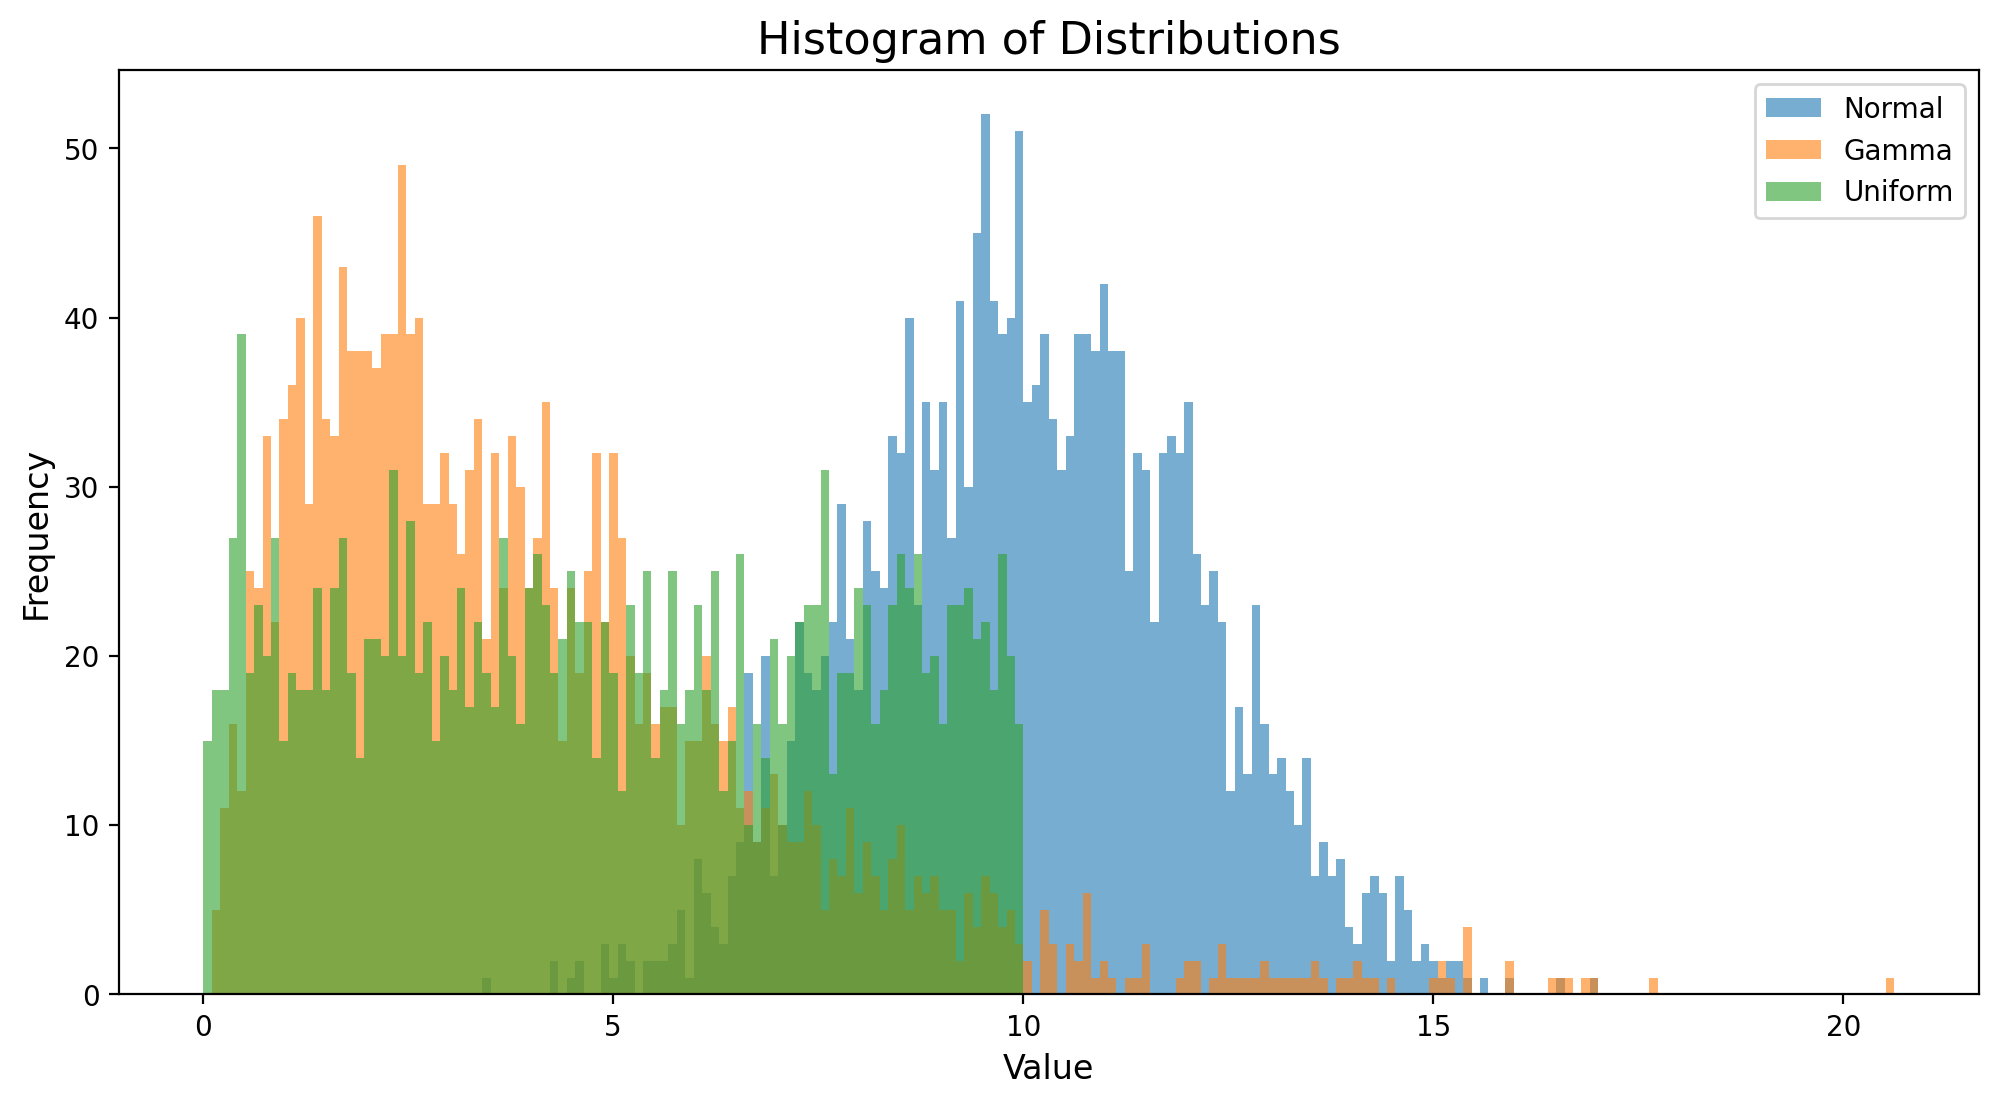

In [25]:
df.plot(kind='hist', bins=200, alpha=0.6, figsize=(12, 6))
plt.title("Histogram of Distributions", fontsize=16)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

### Seeing them separately

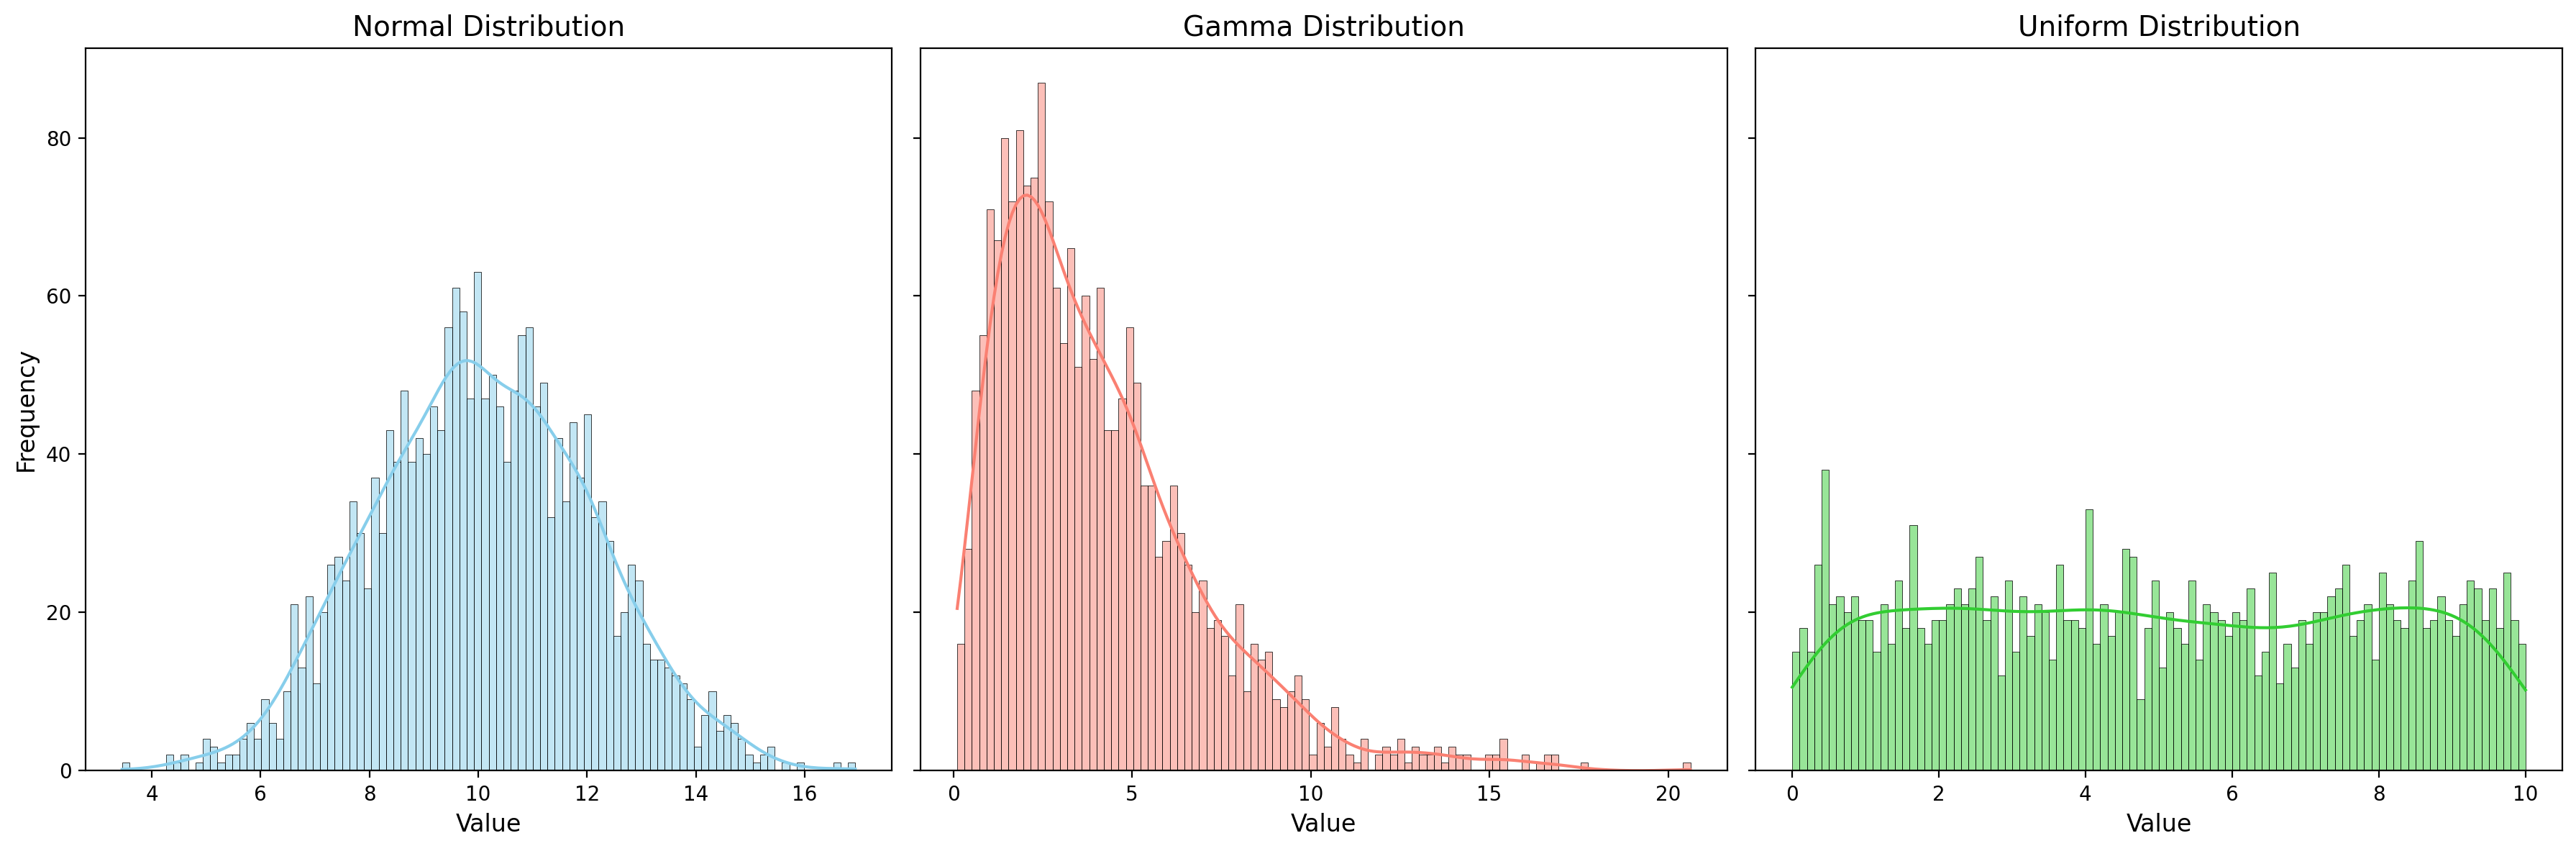

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(df['Normal'], bins=100, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Normal Distribution", fontsize=14)
sns.histplot(df['Gamma'], bins=100, kde=True, color="salmon", ax=axes[1])
axes[1].set_title("Gamma Distribution", fontsize=14)
sns.histplot(df['Uniform'], bins=100, kde=True, color="limegreen", ax=axes[2])
axes[2].set_title("Uniform Distribution", fontsize=14)

for ax in axes:
    ax.set_xlabel("Value", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()

---
<a id="core"></a>
## 3. Core Pandas Data Structures

### Series
A **Series** is a one-dimensional labeled array. It can be created from a Python list or NumPy array, optionally providing a custom index. The index labels let you reference elements by name instead of by integer position.

In [110]:
# Creating a Pandas Series
labels = ['a','b','c','d']
data = [10, 0, 50, 40]
ser = pd.Series(data, index=labels, dtype=np.float64)
ser

a    10.0
b     0.0
c    50.0
d    40.0
dtype: float64

In [113]:
# Other methods to create a Pandas Series
d = {'a': 10, 'b': 0, 'c': 50, 'd': 40}
ser = pd.Series(d)
ser

a    10
b     0
c    50
d    40
dtype: int64

In [115]:
# Accessing by label - like a python dictionary
print("\nValue at index 'c':", ser['c'])
print(d['c'])


Value at index 'c': 50
50


In [116]:
# Vectorized ops
print("\nMultiply entire Series by 2:")
ser*2 


Multiply entire Series by 2:


a     20
b      0
c    100
d     80
dtype: int64

In [117]:
ser.sort_values()

b     0
a    10
d    40
c    50
dtype: int64

In [118]:
ser

a    10
b     0
c    50
d    40
dtype: int64

In [119]:
ser.sort_values(inplace=True)
ser

b     0
a    10
d    40
c    50
dtype: int64

<Axes: >

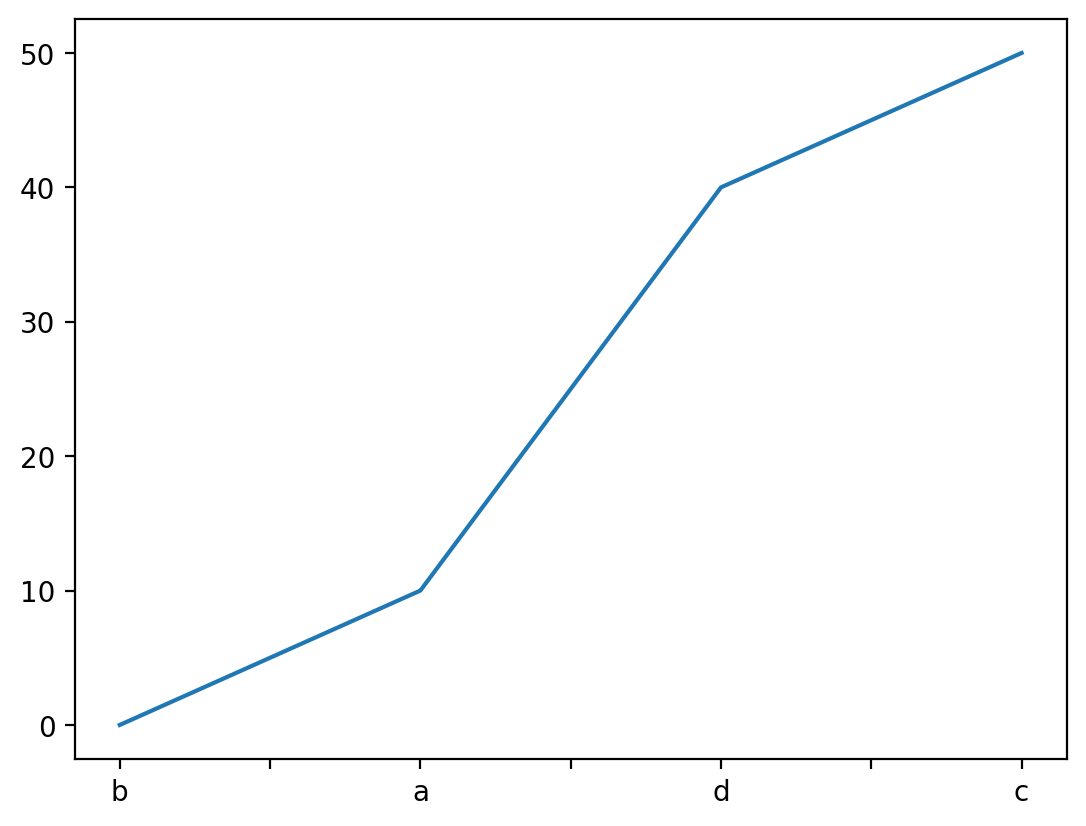

In [120]:
ser.plot()

In [122]:
ser.sort_index(inplace=True)
ser

a    10
b     0
c    50
d    40
dtype: int64

<Axes: >

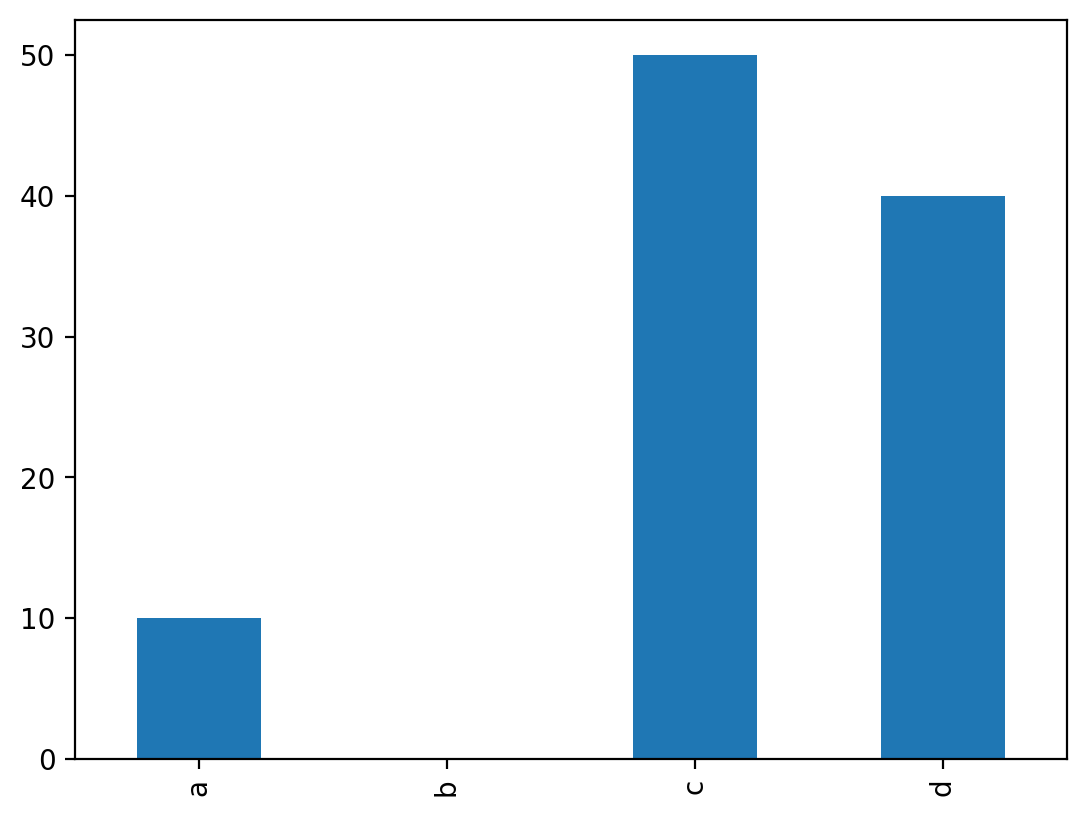

In [125]:
ser.plot.bar()

<Axes: >

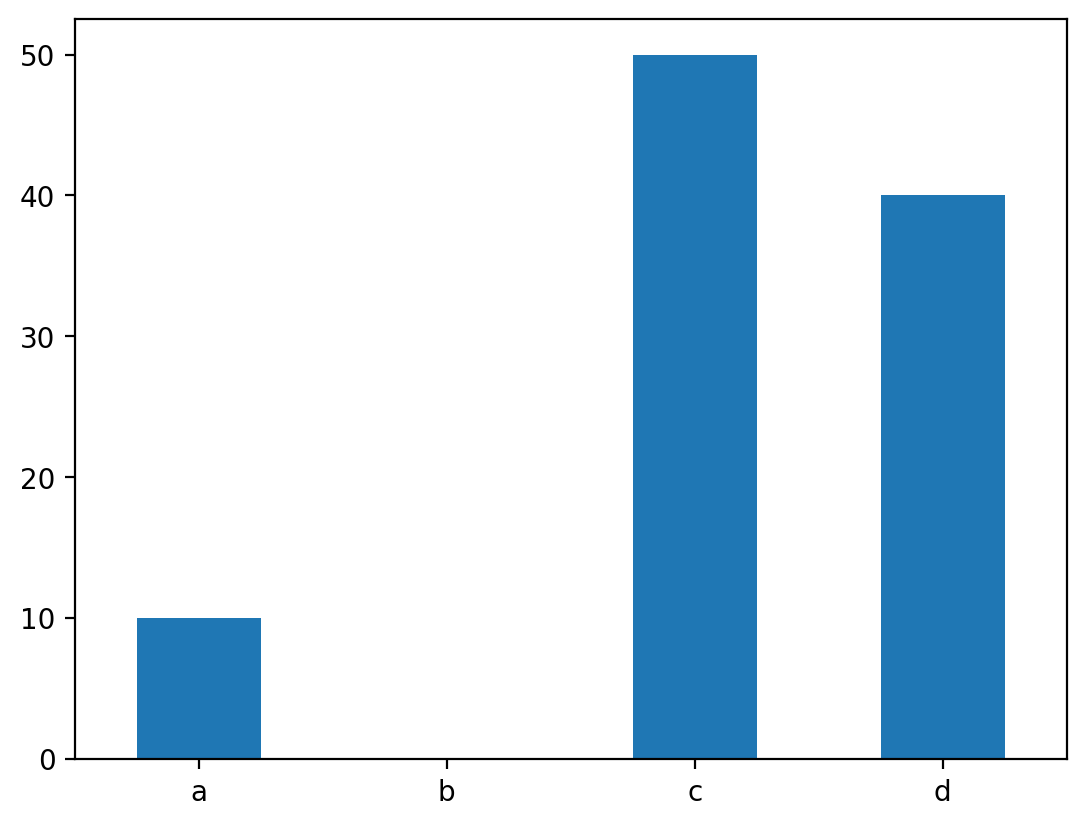

In [124]:
ser.plot(kind='bar', rot=0)

<Axes: >

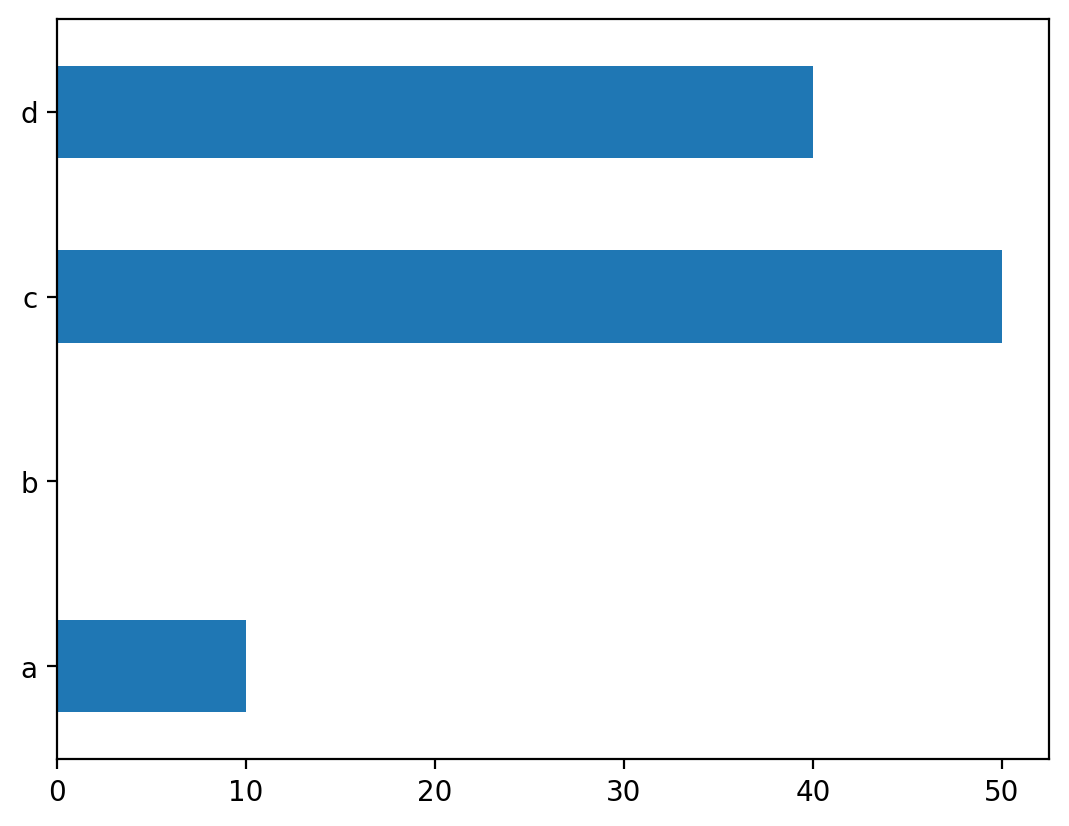

In [126]:
ser.plot(kind='barh')

In [127]:
# Accessing by position - like a numpy array
print("\nValue at position 2:", ser.iloc[2])


Value at position 2: 50


In [128]:
ser

a    10
b     0
c    50
d    40
dtype: int64

In [130]:
# Access by key - like a python dictionary
print("\nValue at index 'c':", ser.loc['c'])
print("\nValue at index 'c':", ser['c'])



Value at index 'c': 50

Value at index 'c': 50


In [40]:
ser['c'], ser.loc['c']

(np.int64(50), np.int64(50))

In [131]:
# Access range
print("\nValues in range 1 to 3:")
ser.iloc[1:3]


Values in range 1 to 3:


b     0
c    50
dtype: int64

In [132]:
# access range by label
print("\nValues in range 'b' to 'd':")
ser.loc['b':'d']


Values in range 'b' to 'd':


b     0
c    50
d    40
dtype: int64

In [133]:
# Other methods
ser.describe()

count     4.000000
mean     25.000000
std      23.804761
min       0.000000
25%       7.500000
50%      25.000000
75%      42.500000
max      50.000000
dtype: float64

In [139]:
print(ser.mean(), type(ser.mean()), ser.mean().item(), type(ser.mean().item()))

25.0 <class 'numpy.float64'> 25.0 <class 'float'>


In [141]:
ser

a    10
b     0
c    50
d    40
dtype: int64

In [140]:
ser.rank()

a    2.0
b    1.0
c    4.0
d    3.0
dtype: float64

In [142]:
# Access numpy array from Pandas Series
arr = ser.values
print("\nNumpy array:", arr)
print("Type of array:", type(arr))


Numpy array: [10  0 50 40]
Type of array: <class 'numpy.ndarray'>


In [144]:
ser

a    10
b     0
c    50
d    40
dtype: int64

In [145]:
# Print series where elements are greater than 20
mask = ser > 20
print(mask)

a    False
b    False
c     True
d     True
dtype: bool


In [146]:
ser[mask]

c    50
d    40
dtype: int64

### DataFrame
A **DataFrame** is a 2D tabular data structure with labeled rows (index) and columns. Each column is essentially a Pandas Series.

We can build one from a dictionary of lists, or by reading data from external sources (CSV, SQL, Excel, etc.).

In [156]:
# Creating a DataFrame from a dictionary
data_dict = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [24, 42, 18],
    'Score': [88.5, 93.0, 78.0]
}
df = pd.DataFrame(data_dict)
df.index = df['Name']
df = df.drop(['Name'], axis=1)
df

,Age,Score
Name,,
Alice,24,88.5
Bob,42,93.0
Charlie,18,78.0


<Axes: xlabel='Name'>

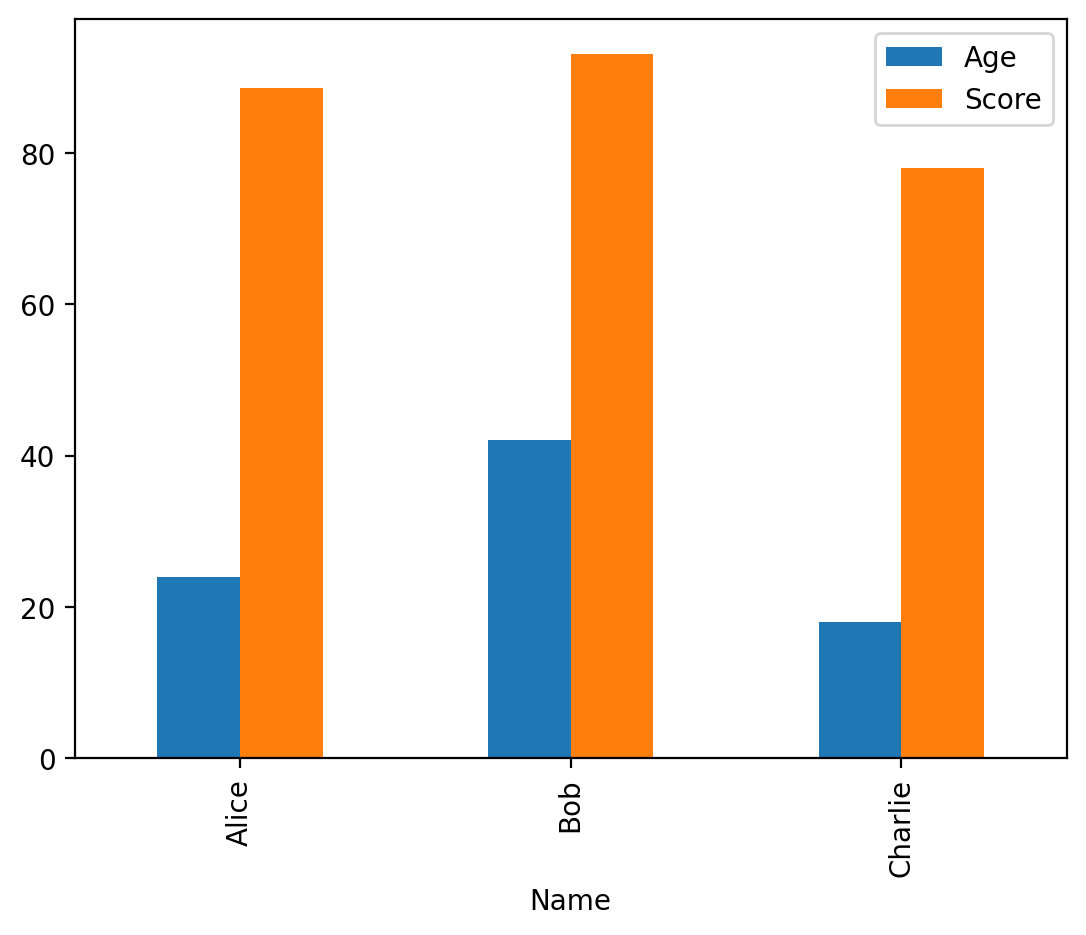

In [158]:
df.plot(kind='bar')

In [150]:
data_dict = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [24, 42, 18],
    'Score': [88.5, 93.0, 78.0]
}
df = pd.DataFrame(data_dict)
df

,Name,Age,Score
0,Alice,24,88.5
1,Bob,42,93.0
2,Charlie,18,78.0


---
<a id="indexing"></a>
## 4. Indexing & Selection

**DataFrame** selection can occur by column name, row label/index name (`.loc`), or row position/numpy-array like indexing (`.iloc`). Boolean masks also apply.

- `df[col]` => a Series of that column.
- `df.loc[row_label]` => row by label.
- `df.iloc[row_position]` => row by integer position.
- Boolean indexing => `df[df['Age'] > 20]`.
- **Slicing** => `df.loc['a':'b']`, `df.iloc[0:2]`.


In [163]:
df2 = pd.DataFrame({
    'X': np.random.rand(5),
    'Y': np.random.rand(5),
    'Z': np.random.randint(1,10,size=5)
}, index=['a','b','c','d','e'])

df2

,X,Y,Z
a,0.996172,0.280775,7
b,0.578735,0.931498,4
c,0.654491,0.699822,4
d,0.172585,0.014937,9
e,0.858278,0.753386,8


In [161]:
df2

,X,Y,Z
a,0.967366,0.753478,2
b,0.401003,0.238826,6
c,0.157301,0.384844,8
d,0.016926,0.387394,7
e,0.659675,0.817511,4


In [164]:
print("\nSelect column 'Y':")
print(df2['Y'])


Select column 'Y':
a    0.280775
b    0.931498
c    0.699822
d    0.014937
e    0.753386
Name: Y, dtype: float64


In [52]:
type(df2['Y'])

pandas.core.series.Series

In [165]:
print("\nSelect row 'c' using loc:")
display(df2.loc['c'])


Select row 'c' using loc:


X    0.654491
Y    0.699822
Z    4.000000
Name: c, dtype: float64

In [166]:
print("\nSelect row at position 2 using iloc:")
display(df2.iloc[2])


Select row at position 2 using iloc:


X    0.654491
Y    0.699822
Z    4.000000
Name: c, dtype: float64

In [167]:
print("\nBoolean mask: rows where Z > 5")
mask = df2['Z'] > 5
display(df2[mask])


Boolean mask: rows where Z > 5


,X,Y,Z
a,0.996172,0.280775,7
d,0.172585,0.014937,9
e,0.858278,0.753386,8


In [168]:
# loc to address by row, col "names" AND iloc to address by row, col "indices"
print(df2.loc['c', 'Y'], df2.iloc[2, 1])

0.6998221861720456 0.6998221861720456


In [169]:
# Select multiple rows
print("\nSelect rows 'a' and 'c':")
display(df2.loc[['a', 'c']])


Select rows 'a' and 'c':


,X,Y,Z
a,0.996172,0.280775,7
c,0.654491,0.699822,4


In [58]:
# Select multiple columns
print("\nSelect columns 'X' and 'Z':")
display(df2[['X', 'Z']])


Select columns 'X' and 'Z':


,X,Z
a,0.610954,6
b,0.059152,3
c,0.483286,9
d,0.325020,8
e,0.059134,3


In [174]:
# Use loc notation to select multiple column
print("\nSelect columns 'X' and 'Z' using loc:")
#display(df2.loc[:, ['X', 'Z']])


# Select rows 'b' and 'd' and columns 'X' and 'Z'
rows_to_select = ['b', 'd']
cols_to_select = ['X', 'Z']
df2.loc[rows_to_select, cols_to_select]


df2.loc['b':'d', 'Y':'Z']


Select columns 'X' and 'Z' using loc:


,Y,Z
b,0.931498,4
c,0.699822,4
d,0.014937,9


In [60]:
# Select rows and columns
print("\nSelect rows 'b' and 'd', columns 'Y' and 'Z':")
display(df2.loc[['b', 'd'], ['Y', 'Z']])


Select rows 'b' and 'd', columns 'Y' and 'Z':


,Y,Z
b,0.895559,3
d,0.573120,8


---
<a id="merging"></a>
## 5. Merging & Joining Data
Pandas provides efficient ways to combine datasets:

- `pd.concat([df1, df2])`: Stack DataFrames (row or column-wise). Preferred for simple stacking horizontally or vertically.
- `df1.append(df2)`: Similar to concat row-wise but less efficient since it involves creation of a new index.
- `pd.merge(df1, df2, on='key')`: Database-style merges. Also `left_on`, `right_on`, `left_index`, `right_index`.

We can specify **how** to merge: 'inner', 'outer', 'left', 'right'.

#### Concatenation of two dataframes with same columns - just stacks them vertically along with their indices

In [175]:
x = pd.DataFrame({'A': ['A0', 'A1'], 'B': ['B0', 'B1']}, index=[0, 1])
y = pd.DataFrame({'A': ['A2', 'A3'], 'B': ['B2', 'B3']}, index=[0, 1])
df_concat = pd.concat([x, y])
display("x:")
display(x)
display("y:")
display(y)
display("pd.concat([x, y]):")
display(df_concat)

'x:'

,A,B
0,A0,B0
1,A1,B1


'y:'

,A,B
0,A2,B2
1,A3,B3


'pd.concat([x, y]):'

,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


#### Having similar indices will result in ambuiguity in addressing the rows, so we need to reset the index or use `ignore_index=True`

In [176]:
df_concat.loc[0]

,A,B
0,A0,B0
0,A2,B2


In [178]:
df = pd.concat([x, y], ignore_index=True)
df

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


#### Example specifying the axis of concatenation - row-wise or column-wise.

In [179]:
z = pd.DataFrame({'C': ['C0', 'C1'], 'D': ['D0', 'D1']}, index=[0, 1])
df_col_combine = pd.concat([x, z], axis='columns')

display("x:")
display(x)
display("z:")
display(z)
display("pd.concat([x, z], axis='columns'):")
display(df_col_combine)

'x:'

,A,B
0,A0,B0
1,A1,B1


'z:'

,C,D
0,C0,D0
1,C1,D1


"pd.concat([x, z], axis='columns'):"

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


#### Let's use seaborn's 'tips' dataset to demonstrate merges.

In [180]:
tips = sns.load_dataset('tips')  # Load the 'tips' dataset from seaborn
print("'tips' dataset shape:", tips.shape)  # Print the shape (rows, columns) of the dataset
display(tips.head())  # Show the first 5 rows of the dataset

'tips' dataset shape: (244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [181]:
is_vip = np.random.choice([True, False], size=len(tips))  # Randomly assign VIP status (True/False) to each row

customer_ids = np.arange(1, len(tips) + 1)  # Create unique customer IDs starting from 1
np.random.shuffle(customer_ids)  # Shuffle the customer IDs randomly

vip_info = pd.DataFrame({
    'customer_id': customer_ids,  # Assign customer IDs
    'vip': is_vip  # Assign the corresponding VIP status
})

print("VIP info:")
display(vip_info)  # Display the VIP information table

VIP info:


,customer_id,vip
0,119,True
1,148,True
2,2,True
3,84,True
4,76,False
...,...,...
239,218,True
240,146,True
241,176,True
242,164,False


In [182]:
tips_ext = tips.copy()  # Create a copy of the original 'tips' dataset
new_customer_ids = np.arange(1, len(tips) + 1)  # Generate new unique customer IDs
np.random.shuffle(new_customer_ids)  # Shuffle the customer IDs randomly

tips_ext['customer_id'] = new_customer_ids  # Add the shuffled customer IDs as a new column
print("Extended tips:")
display(tips_ext)  # Show the extended dataset


Extended tips:


,total_bill,tip,sex,smoker,day,time,size,customer_id
0,16.99,1.01,Female,No,Sun,Dinner,2,32
1,10.34,1.66,Male,No,Sun,Dinner,3,22
2,21.01,3.50,Male,No,Sun,Dinner,3,136
3,23.68,3.31,Male,No,Sun,Dinner,2,137
4,24.59,3.61,Female,No,Sun,Dinner,4,156
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,228
240,27.18,2.00,Female,Yes,Sat,Dinner,2,84
241,22.67,2.00,Male,Yes,Sat,Dinner,2,219
242,17.82,1.75,Male,No,Sat,Dinner,2,241


In [183]:
merged = pd.merge(tips_ext, vip_info, on='customer_id', how='left')  # Merge the datasets using 'customer_id'
print("Merged Data:")
display(merged)  # Display the merged dataset

Merged Data:


,total_bill,tip,sex,smoker,day,time,size,customer_id,vip
0,16.99,1.01,Female,No,Sun,Dinner,2,32,True
1,10.34,1.66,Male,No,Sun,Dinner,3,22,False
2,21.01,3.50,Male,No,Sun,Dinner,3,136,True
3,23.68,3.31,Male,No,Sun,Dinner,2,137,True
4,24.59,3.61,Female,No,Sun,Dinner,4,156,False
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,228,False
240,27.18,2.00,Female,Yes,Sat,Dinner,2,84,True
241,22.67,2.00,Male,Yes,Sat,Dinner,2,219,False
242,17.82,1.75,Male,No,Sat,Dinner,2,241,True


---
<a id="groupby"></a>
## 6. GroupBy & Aggregation

The **GroupBy** abstraction splits data into groups, applies operations, then combines results. Common for summarizing numeric columns by categories.

### Example with tips data
We'll group by day of the week and compute average tip, total tip, etc.

In [69]:
tips.loc[:, 'day']

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [184]:
tips['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [187]:
# Unique values in the 'day' column
unique_days = tips['day'].unique()
print("Unique days:", unique_days)

Unique days: ['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']


In [188]:
mask = tips['day'] == 'Sun'
mask

0       True
1       True
2       True
3       True
4       True
       ...  
239    False
240    False
241    False
242    False
243    False
Name: day, Length: 244, dtype: bool

In [189]:
tips[mask]['tip'].mean().item()

3.2551315789473687

In [190]:
out = {}
for day in unique_days:
    mask = tips['day'] == day
    out[day] = tips[mask]['tip'].mean().item()

out

{'Sun': 3.2551315789473687,
 'Sat': 2.993103448275862,
 'Thur': 2.771451612903225,
 'Fri': 2.7347368421052627}

<Axes: >

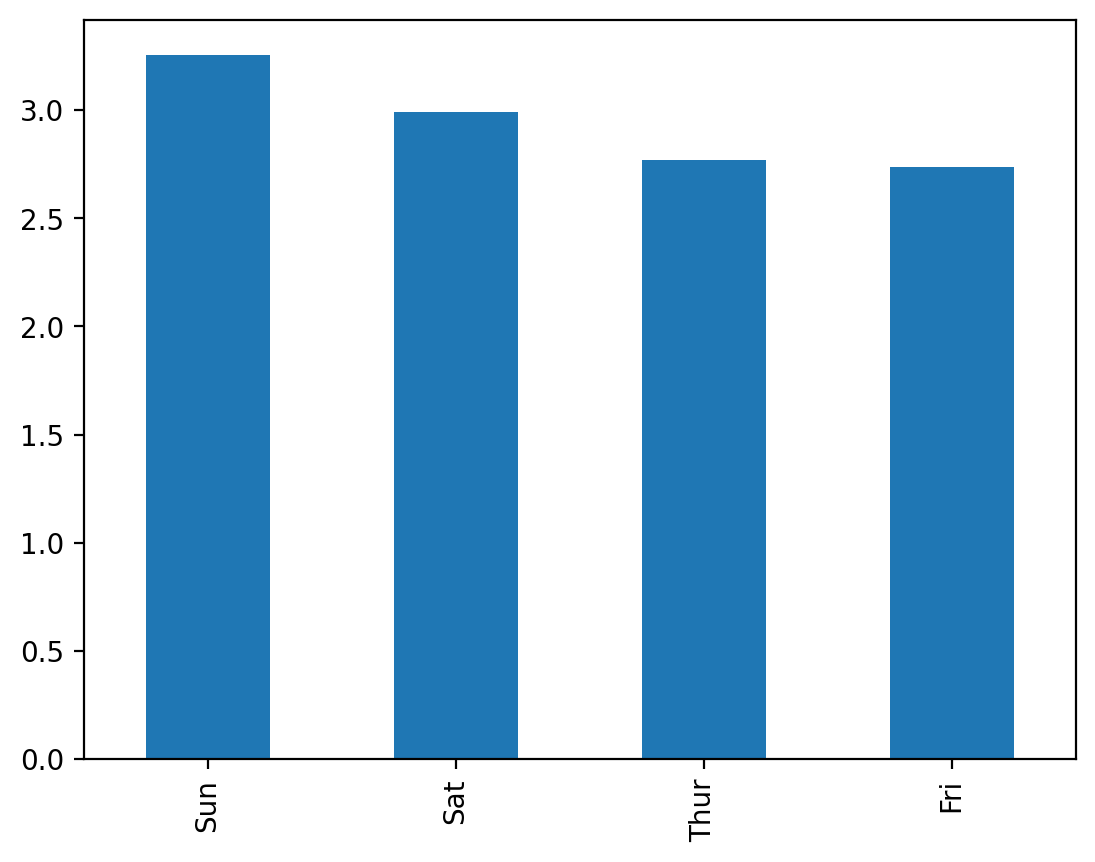

In [192]:
ser = pd.Series(out)
ser.plot(kind='bar')

In [194]:
grpby = tips.groupby('day', observed=True)['tip']
grpby.mean()

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

In [195]:
# Group tips by 'day' column, aggregate 'tip' in different ways
grouped = tips.groupby('day', observed=True)['tip']
print("Mean tip by day:")
display(grouped.mean())

print("\nMultiple Aggregations (count, sum, mean):")
display(grouped.agg(['count','sum','mean','std']))

Mean tip by day:


day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64


Multiple Aggregations (count, sum, mean):


,count,sum,mean,std
day,,,,
Thur,62,171.83,2.771452,1.240223
Fri,19,51.96,2.734737,1.019577
Sat,87,260.40,2.993103,1.631014
Sun,76,247.39,3.255132,1.234880


**Multiple Grouping Keys**: We can group by multiple columns, e.g. day and time (Lunch/Dinner).

In [78]:
multi_grouped = tips.groupby(['day', 'time'], observed=True)['total_bill'].agg(['mean','size'])
multi_grouped

mean  size
day  time                   
Thur Lunch   17.664754    61
     Dinner  18.780000     1
Fri  Lunch   12.845714     7
     Dinner  19.663333    12
Sat  Dinner  20.441379    87
Sun  Dinner  21.410000    76

---
<a id="pivot"></a>
## 7. Pivot Tables
Pivot tables provide a 2D summarization akin to spreadsheets:
```python
df.pivot_table(values='col', index='rows', columns='cols', aggfunc='mean')
```
We can also specify margins (`margins=True`) to get row/column totals.

In [79]:
# Pivot example using 'tips'
pivot_tips = tips.pivot_table(
    values='tip',
    index='day',
    columns='time',
    aggfunc='mean',
    margins=True, observed=True
)
pivot_tips

time,Lunch,Dinner,All
day,,,
Thur,2.767705,3.000000,2.771452
Fri,2.382857,2.940000,2.734737
Sat,NaN,2.993103,2.993103
Sun,NaN,3.255132,3.255132
All,2.728088,3.102670,2.998279


In [80]:
# handling nan values by filling them with 0
tips_fillna = pivot_tips.fillna(0, inplace=False)

# handling nan values by dropping them
tips_dropna = pivot_tips.dropna()

display(tips_fillna)
display(tips_dropna)

time,Lunch,Dinner,All
day,,,
Thur,2.767705,3.000000,2.771452
Fri,2.382857,2.940000,2.734737
Sat,0.000000,2.993103,2.993103
Sun,0.000000,3.255132,3.255132
All,2.728088,3.102670,2.998279


time,Lunch,Dinner,All
day,,,
Thur,2.767705,3.00000,2.771452
Fri,2.382857,2.94000,2.734737
All,2.728088,3.10267,2.998279


---
<a id="strings"></a>
## 8. String Operations
Pandas offers vectorized string methods under `str`. They handle missing data gracefully and allow powerful regex usage.

Key methods:
- **case changes**: `.str.lower()`, `.str.upper()`, `.str.title()`, etc.
- **trimming**: `.str.strip()`, `.str.rstrip()`, etc.
- **Regex**: `.str.contains()`, `.str.extract()`, `.str.replace()`.
- **split**: `.str.split()`, `.str.get()`, etc.


In [196]:
# Example: string cleaning
s_str = pd.Series(["  HELLO  ", "world! ", None, "PyTHon 3.9 ", "pandas is COOL "], name='mystrings')
print("Original:")
display(s_str)

# Lower + strip
cleaned = s_str.str.lower().str.strip()

print("Cleaned:")
display(cleaned)

# Contains 'python'?
print("\nContains 'python'?")
display(cleaned.str.contains('python'))

# Replace 'is' with 'IS'
replaced = cleaned.str.replace('is', 'IS', case=False)
print("\nReplaced 'is':")
display(replaced)

Original:


0            HELLO  
1            world! 
2               None
3        PyTHon 3.9 
4    pandas is COOL 
Name: mystrings, dtype: object

Cleaned:


0             hello
1            world!
2              None
3        python 3.9
4    pandas is cool
Name: mystrings, dtype: object


Contains 'python'?


0    False
1    False
2     None
3     True
4    False
Name: mystrings, dtype: object


Replaced 'is':


0             hello
1            world!
2              None
3        python 3.9
4    pandas IS cool
Name: mystrings, dtype: object

The presence of `None` doesn't break things: the `.str` accessor handles missing data by returning `NaN` in operations.

---
<a id="evalquery"></a>
## 9. Using `eval()` & `query()`

**`eval()`** allows efficient expression evaluation on DataFrame columns:
```python
df.eval('NewCol = (A + B) / C', inplace=True)
```
You can treat column names like variables, and skip creation of large temporary arrays.

**`query()`** provides a more readable syntax for row selection:
```python
df.query('A < 5 and B > 2')
```


In [82]:
df_eval = pd.DataFrame({
    'A': np.random.randn(5),
    'B': np.random.randn(5),
    'C': np.random.randn(5)
})
print("Before eval:")
display(df_eval)

df_eval.eval('D = (A + B) * C', inplace=True)
print("\nAfter eval, new column 'D':")
display(df_eval)

# query
res_q = df_eval.query('D > 0')
print("\nRows where D > 0:")
display(res_q)

Before eval:


,A,B,C
0,-1.065378,-0.126780,0.644445
1,-2.225845,-0.966845,-1.219053
2,-1.012120,0.980824,-0.766431
3,-1.453329,0.220464,-2.387369
4,-0.756387,0.964827,1.534876



After eval, new column 'D':


,A,B,C,D
0,-1.065378,-0.126780,0.644445,-0.768281
1,-2.225845,-0.966845,-1.219053,3.892059
2,-1.012120,0.980824,-0.766431,0.023986
3,-1.453329,0.220464,-2.387369,2.943305
4,-0.756387,0.964827,1.534876,0.319929



Rows where D > 0:


,A,B,C,D
1,-2.225845,-0.966845,-1.219053,3.892059
2,-1.012120,0.980824,-0.766431,0.023986
3,-1.453329,0.220464,-2.387369,2.943305
4,-0.756387,0.964827,1.534876,0.319929
